In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Cleaned_Customer.csv")
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324


In [3]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324


# Scale the data

In [4]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df))

In [16]:
scaled_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,-0.425020,0.179086
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,-0.469670,-1.610714
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,-0.107804,0.208980


# Apply PCA to reduce dimensions

In [6]:
pca = PCA(n_components=10)  
reduce_data= pca.fit_transform(scaled_data)

In [7]:
# Check the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)


Explained Variance Ratio for each component: [0.30886905 0.19020344 0.08645198 0.06765374 0.05645576 0.05301051
 0.04485097 0.03868162 0.03757212 0.02860814]
Cumulative Variance Explained: [0.30886905 0.49907248 0.58552447 0.65317821 0.70963397 0.76264448
 0.80749546 0.84617707 0.88374919 0.91235733]


# Reapply DBSCAN on reduced data

In [12]:
dbscan = DBSCAN(eps=5.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(reduce_data)


In [13]:
df['DBSCAN_Cluster'] = dbscan_labels

# Compute Silhouette Score

In [14]:
silhouette_avg = silhouette_score(reduce_data, dbscan_labels)
print(f"Silhouette Score after PCA: {silhouette_avg}")

Silhouette Score after PCA: 0.7756334603920723


- After applying PCA and clustering, the Silhouette Score is 0.776, indicating well-separated and cohesive clusters. This shows that dimensionality reduction with PCA significantly improved clustering quality, making it effective for uncovering meaningful patterns in the data.

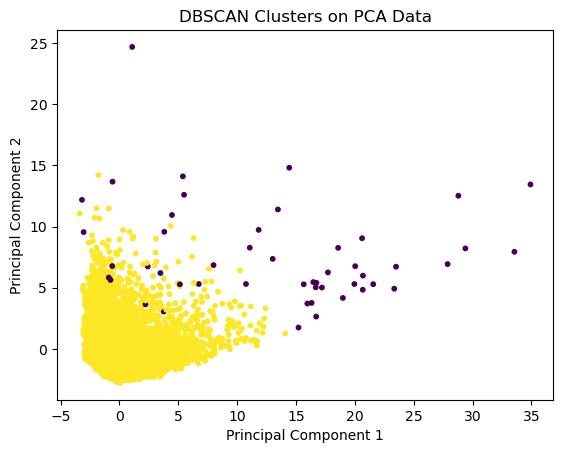

In [15]:
plt.scatter(reduce_data[:, 0],reduce_data[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clusters on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


- The plot depicts clusters formed by DBSCAN on PCA-transformed data:

1. **Clusters**: Two clusters are evident:
   - **Yellow**: A large, dense cluster likely representing the majority of well-grouped data points.
   - **Purple**: Noise points or a less dense, smaller cluster distributed farther from the dense core.

2. **Separation**: The clusters are reasonably well-separated in the reduced-dimensional space, supporting the silhouette score of **0.775**.

3. **Interpretation**:
   - The large yellow cluster suggests a dominant structure or pattern in the data.
   - Purple points might represent outliers or distinct, sparse clusters requiring further analysis.



# Filter for purple points 

In [18]:
# Filter for purple points (outliers or small clusters)
purple_points = df[dbscan_labels != 0]

In [19]:
# Analyze key features of the purple points
print(purple_points[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].describe())

            BALANCE     PURCHASES  CREDIT_LIMIT      PAYMENTS
count     49.000000     49.000000     49.000000     49.000000
mean    6554.833900  16306.550204  13820.408163  20871.174029
std     4294.659999  13136.439902   5962.451243  12585.517611
min     1132.386178      0.000000   3000.000000     92.865469
25%     2990.422186   4004.000000   9000.000000  11400.601300
50%     5968.583246  15108.470000  14000.000000  20941.325510
75%     8823.284205  25615.070000  18000.000000  28232.694460
max    19043.138560  49039.570000  30000.000000  50721.483360


### Insights on Purple Points (Outliers/Small Clusters):

1. **Balances**: Customers have an average balance of **₹6,554**, ranging from **₹1,132** to **₹19,043**, indicating varied account usage.

2. **Purchases**: Average spending is **₹16,306**, with extremes from **₹0** to **₹49,039**, highlighting a mix of high spenders and inactive customers.

3. **Credit Limits**: Credit limits average at **₹13,820**, ranging from **₹3,000** to **₹30,000**, showing mid-to-high credit flexibility.

4. **Payments**: Payments vary significantly, averaging **₹20,871**, from as low as **₹93** to as high as **₹50,721**, reflecting diverse repayment behaviors.

### Key Takeaway:
This group includes a mix of high spenders, low utilizers, and irregular payers, making them ideal for personalized strategies like targeted offers or credit monitoring.

# Filter for yellow cluster (main cluster)

In [20]:
# Filter for yellow cluster.
yellow_cluster = df[dbscan_labels == 0]

In [21]:
# Focus on key features for more insights
print(yellow_cluster[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].describe())

            BALANCE     PURCHASES  CREDIT_LIMIT      PAYMENTS
count   8901.000000   8901.000000   8901.000000   8901.000000
mean    1537.002904    918.959926   4442.942156   1627.789007
std     2029.603603   1537.262953   3555.195054   2354.922658
min        0.000000      0.000000     50.000000      0.000000
25%      126.327940     37.920000   1500.000000    381.479704
50%      865.161494    359.840000   3000.000000    848.624102
75%     2015.554911   1096.980000   6100.000000   1882.437447
max    18495.558550  15704.040000  30000.000000  34107.074990


### Insights on Yellow Cluster:

1. **Balances**:
   - The average balance is **₹1,537**, significantly lower than the purple cluster, ranging from **₹0** to **₹18,495**. Most customers maintain relatively small balances, with 75% holding less than **₹2,016**.

2. **Purchases**:
   - Average purchases are **₹919**, with a wide range from **₹0** to **₹15,704**. A majority of customers (75%) spend less than **₹1,097**, indicating modest purchasing behavior.

3. **Credit Limits**:
   - The average credit limit is **₹4,443**, with a range of **₹50** to **₹30,000**. Most customers have a lower credit limit, with 50% having limits of **₹3,000** or less.

4. **Payments**:
   - Average payments are **₹1,628**, ranging from **₹0** to **₹34,107**. A majority of customers make payments under **₹1,882**, showing modest repayment behavior.

### Key Takeaway:
The yellow cluster represents the **majority of customers** with lower balances, purchases, and payments. They are likely average or low-engagement customers, making them ideal for general strategies to encourage higher activity or spending.

# Analyze Key Ratios
- Create and compare derived features like credit utilization, spending-to-payment ratios, etc., to identify behavioral differences.

In [22]:
# Add derived features for deeper analysis
df['Credit_Utilization'] =df['BALANCE'] / df['CREDIT_LIMIT']
df['Spending_to_Payment_Ratio'] = df['PURCHASES'] / df['PAYMENTS']

# Compare new features across clusters
cluster_ratios = df.groupby(dbscan_labels)[['Credit_Utilization', 'Spending_to_Payment_Ratio']].mean()
print(cluster_ratios)


    Credit_Utilization  Spending_to_Payment_Ratio
-1            0.532773                   1.013308
 0            0.388092                        inf


### Analysis of Key Ratios:

1. **Credit Utilization**:
   - **Outliers (-1)**: The average credit utilization is **53.3%**, indicating these customers are using more than half of their available credit, which may reflect higher financial activity or potential risk.
   - **Yellow Cluster (0)**: The average credit utilization is **38.8%**, significantly lower, suggesting more conservative credit usage among these customers.

2. **Spending-to-Payment Ratio**:
   - **Outliers (-1)**: The ratio is **1.01**, indicating that their spending closely matches their payments, reflecting balanced financial behavior.
   - **Yellow Cluster (0)**: The ratio is **infinite** because some customers have **zero payments**, leading to undefined or excessively high values, potentially flagging financial risk or inactivity.

---

### Key Takeaways:
- **Behavioral Differences**:
  - Outliers (-1) are higher credit users with balanced spending and payments, making them active but potentially risky.
  - The yellow cluster (0) is more conservative in credit use but has concerning payment patterns, with zero payments inflating the spending-to-payment ratio.

- **Actionable Insights**:
  - **Outliers**: Monitor closely for repayment risks or tailor offers to encourage higher spending within safe limits.
  - **Yellow Cluster**: Focus on engagement strategies to encourage consistent payments and balanced financial behavior.

In [23]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO,DBSCAN_Cluster,Credit_Utilization,Spending_to_Payment_Ratio
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182,0,0.040901,0.472740
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218,0,0.457495,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159,0,0.332687,1.242905
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609,0,0.222223,inf
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324,0,0.681429,0.023587


In [25]:
df.to_csv("clusterd_csv")